In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:ylabel='Frequency'>

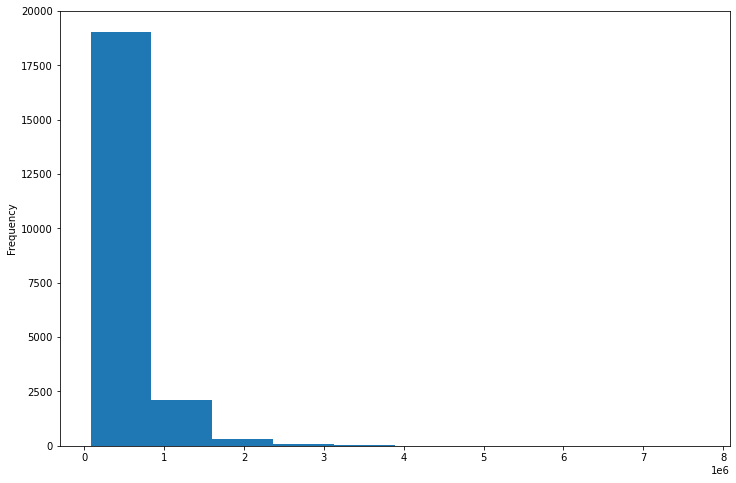

In [28]:
plt.subplots(figsize=(12,8))
df['price'].plot.hist()

In [61]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [29]:
df.corr().sort_values(by='price', ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
sqft_living15,-0.002701,0.585241,0.393406,0.569884,0.756402,0.144763,0.280102,0.731767,0.326377,-0.000247,-0.279299,0.048679,0.335626,1.000000,0.183515
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
lat,-0.001798,0.306692,-0.009951,0.024280,0.052155,-0.085514,0.049239,-0.001199,-0.148370,0.032145,0.266742,1.000000,-0.135371,0.048679,-0.086139
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204


<AxesSubplot:>

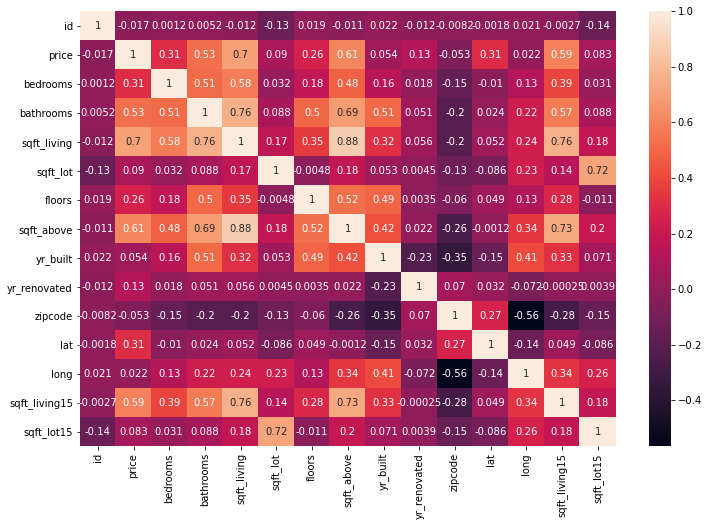

In [64]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [30]:
#0.7 corr, sqft_living to price

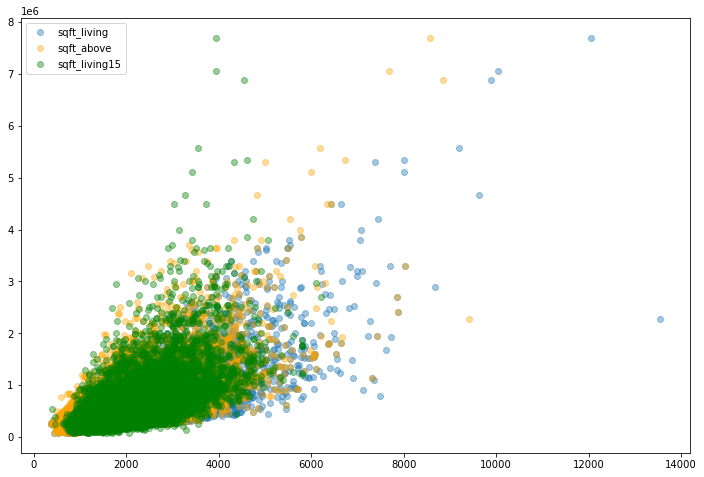

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df['sqft_living'], y=df['price'], alpha=0.4, label='sqft_living')
ax.scatter(x=df['sqft_above'], y=df['price'], alpha=0.4, label='sqft_above', color='orange')
ax.scatter(x=df['sqft_living15'], y=df['price'], alpha=0.4, label='sqft_living15', color='green')
#ax.scatter(x=df['bathrooms'], y=df['price'], alpha=0.4, label='bathrooms', color='cyan')
#ax.set_title('sqft_living vs price')
ax.legend()

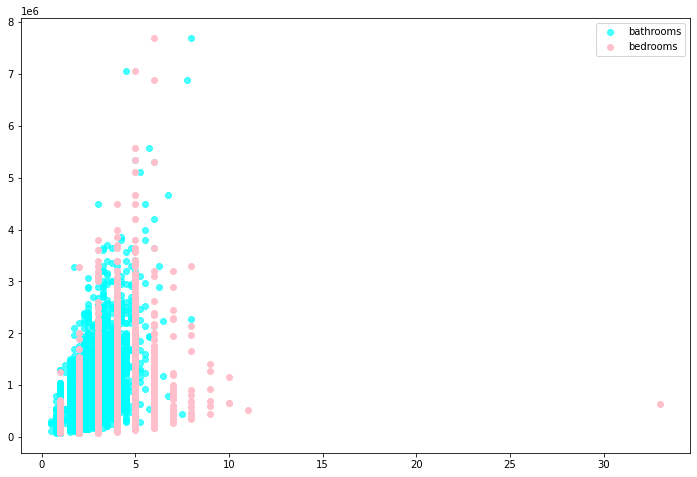

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df['bathrooms'], y=df['price'], alpha=0.7, label='bathrooms', color='cyan')
ax.scatter(x=df['bedrooms'], y=df['price'], alpha=1, label='bedrooms', color='pink')
#ax.set_title('bathrooms vs price')
ax.legend()

In [33]:
#???
df.sort_values(by='bedrooms', ascending=False).head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,NO,NONE,Average,7 Average,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,NO,AVERAGE,Average,9 Better,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400


In [34]:
#yr_renovated requires any preprocess?
#replace 0s with yr_built? new feature "years_since_renovated"?
#have to check corr either way, probably can only take one

In [79]:
#X_train, X_test, y_train, y_test = train_test_split(df[['sqft_living']], df[['price']])

In [80]:
#baseline = LinearRegression()
#baseline.fit(X_train, y_train)
#baseline.score(X_test, y_test)

0.4903394687486575

In [81]:
#cross_val_score(baseline, X_train, y_train, cv=3)

array([0.50167182, 0.48457101, 0.49300383])

In [82]:
baseline = LinearRegression()
splitter = ShuffleSplit(n_splits=10, test_size=0.25)



baseline_scores = cross_validate(
    estimator=baseline,
    X=df[['sqft_living']],
    y=df[['price']],
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4927309993769695
Validation score: 0.4917274459260839
